In [2]:
%matplotlib inline

# **Fuse light-sheet based datasets with sequential dual-sided illumination**



This tutorial shows how to apply Leonardo-FUSE to integrate light-sheet datasets with dual-sided illumination together.


The data used here is available in [zenodo](https://). We use volumes "I0_D1_crop.tiff" and "I1_D1_crop.tiff" for this tutorial. Here, "I0" and "I1" mean two opposite illumination lenses, while "D1" means the same detection lens.

## **Import packages & data**

In [ ]:
# in case Leonardo-FUSE is not installed yet
!git clone https://github.com/peng-lab/LSFM-fusion.git
!pip install ./LSFM-fusion

In [1]:
from FUSE import FUSE_illu

In [6]:
# load datasets
import tifffile
from google.colab import drive
drive.mount("/content/drive/", force_remount = True)

X0 = tifffile.imread("/content/drive/MyDrive/LSFM/Multi-View-Reconstruction/zenodo/I0_D1_crop.tiff")
X1 = tifffile.imread("/content/drive/MyDrive/LSFM/Multi-View-Reconstruction/zenodo/I1_D1_crop.tiff")

Mounted at /content/drive/


## **Start fusion**

First, let's visualize the maximum intensity projection of the two datasets to figure out the orientation of the system:

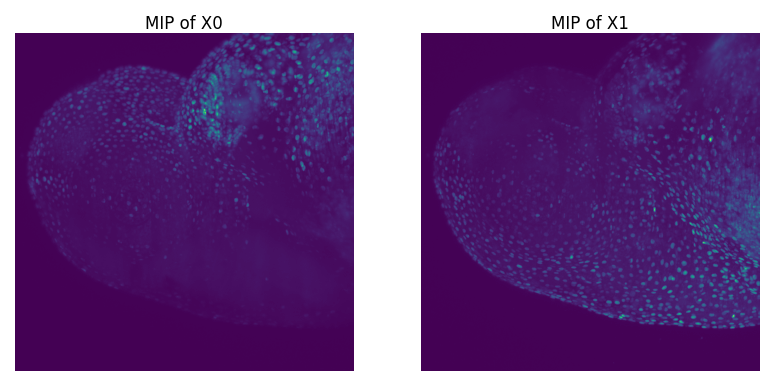

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=150)
ax1.imshow(X0.max(0))
ax1.set_title("MIP of X0", fontsize=8, pad=1)
ax1.axis("off")
ax2.imshow(X1.max(0))
ax2.set_title("MIP of X1", fontsize=8, pad=1)
ax2.axis("off")
plt.show()

We can observe that light sheet comes from top and bottom (in the image space) for volume X0 and X1, respectively.
<br/>
<br/>
Next, we can initialize a `FUSE_illu` object. Here, we initilize FUSE_illu using default parameters. A more advanced list of available arguments can be found in section [API reference](https://leonardo-lsfm.readthedocs.io/en/latest/api.html)




In [12]:
model = FUSE_illu()

Finally, we start fusion by calling `train` function. datasets X0 and X1 are fed as `top_illu_data` and `bottom_illu_data`, respectively, corresponding to their illumination orientation. The fusion result, together with a few intermidiate results, will be saved in folder `save_folder` under path `save_path`.

Read in...

Localize sample...
           startX   endX startY    endY         maxv
top             0    992      0    1024  3454.000244
bottom          0    997      0    1024  2523.999512
in summary    0.0  997.0    0.0  1024.0  3454.000244


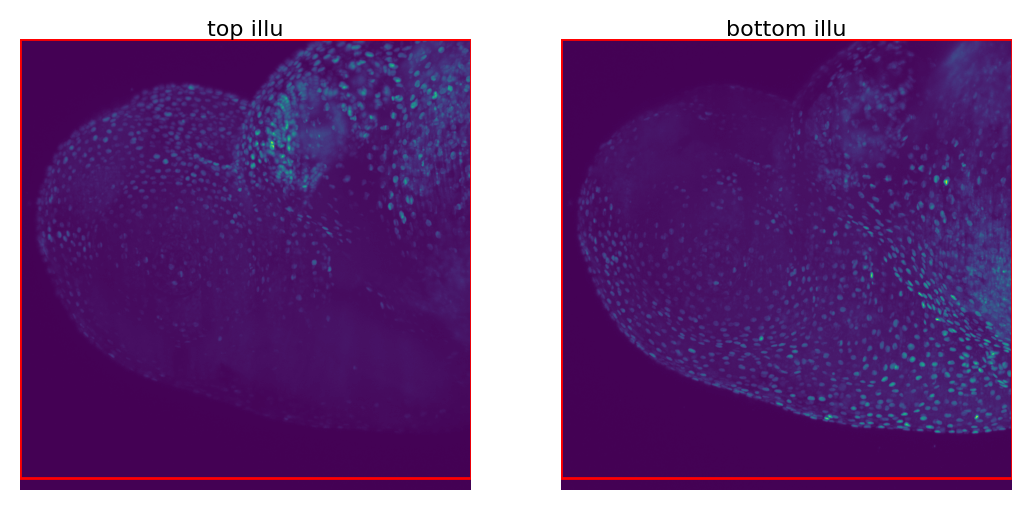


Calculate volumetric measurements...
top/left view: minimum intensity = 65.0, maximum intensity = 2973.0, OTSU threshold = 149.0
bottom/right view: minimum intensity = 63.0, maximum intensity = 2108.0, OTSU threshold = 145.0

Extract features...


NSCT: 100%|██████████| 26/26 [01:02<00:00,  2.42s/it]



Segment sample...


refine along z: 100%|██████████| 2600/2600 [00:04<00:00, 587.83it/s] 



Dual-illumination fusion...
to GPU...
No.049 iteration EM: maximum changes = 1.0
Stitching...


fusion: 100%|██████████| 260/260 [00:10<00:00, 23.82it/s]


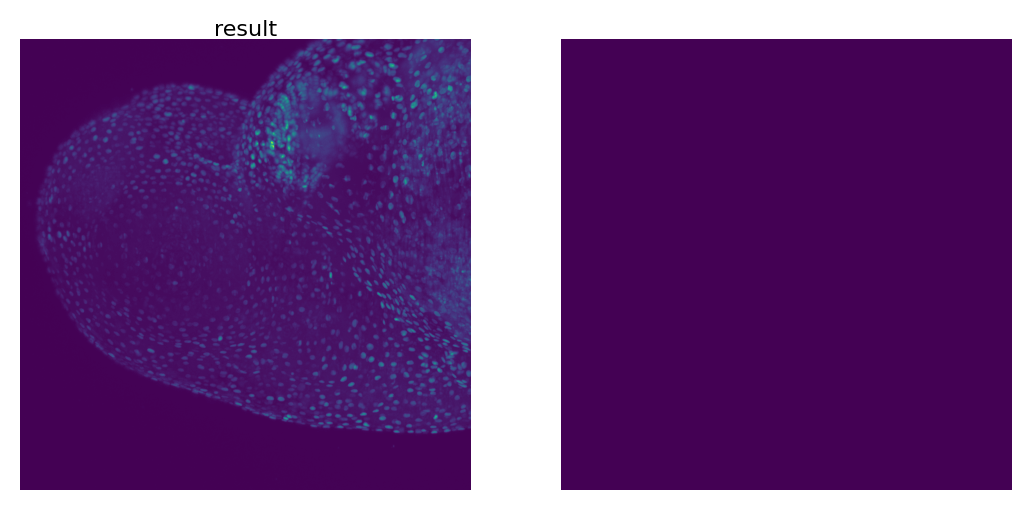

Save...


In [13]:
# start fusion
save_path = "./"
save_folder = "fuse_illu_result"

out = model.train(top_illu_data = X0,
                  bottom_illu_data = X1,
                  save_path = save_path,
                  save_folder = save_folder,
                  )

## **NOTE 1**

In reality, to facilitate batch processing, users can also feed in data-to-be-fused without reading them into the memory. To do so, please save the data-to-be-fused in such structure:
```
    data_path
        ├─ sample_name
                    ├─ I0_D1.tiff
                    ├─ I1_D1.tiff
```
and call the `train` function as follows:

```
out = model.train(data_path = data_path,
                  sample_name = sampel_name,
                  top_illu_data = "I0_D1.tiff",
                  bottom_illu_data = "I1_D1.tiff",
                  save_path = save_path,
                  save_folder = save_folder,
                  )
```



## **NOTE 2**

Depends on the system, the illumination orientation in then image space can also from left or right. In this way, input datasets should be called by `left_illu_data` and `right_illu_data`, instead of `top_illu_data` and `bottom_illu_data`:
```
out = model.train(left_illu_data = X0, # suppose X0 is illuminated from the left
                  right_illu_data = X1, # suppose X0 is illuminated from the right
                  save_path = save_path,
                  save_folder = save_folder,
                  )
```